## Курсач

Ваша задача этом соревновании - предсказать факт невыполнения кредитных обязательств в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и факт невыполнения кредитных обязательств) и test.csv (только признаки).

https://www.kaggle.com/c/gb-credit-default

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
* **Current Credit Balance** - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - баллы кредитного рейтинга
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*

* F1-score > 0.5 на private Leaderboard
* F1-score_1, recall_1, precision_1 > 0.5
* Решение прикреплять в ДЗ к Урок 4. Оценка и интерпретация полученной модели. Обсуждение курсового проекта.
* Указать свой ник на kaggle


*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import matplotlib
import random

from random import randint
from scipy import stats

from sklearn.metrics import r2_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import xgboost as xgb
import catboost as catb
import lightgbm as lgbm

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 12})  # размер шрифта на графиках

## Полезные функции

In [2]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [3]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [4]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [5]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [6]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [7]:
# Функция для заполнения NAN значений медианой по признаку
def fill_nan_median(feature_name, df):
    df_fill = df.copy()
    median = df_fill[feature_name].median()
    df_fill[feature_name] = df_fill[feature_name].fillna(median)
    return df_fill

In [8]:
# Функция для заполнения NAN значений модой по признаку
def fill_nan_mode(feature_name, df):
    df_fill = df.copy()
    mode = df_fill[feature_name].mode()[0]
    df_fill[feature_name] = df_fill[feature_name].fillna(mode)
    return df_fill

In [9]:
# Функция для замены категориальных признаков типа {А/В} на {0/1}
def fill_category(feature_name, df, dict_rep):
    df_fill = df.copy()
    df_fill[feature_name + '_ctg'] = df_fill[feature_name].replace(dict_rep)
    return df_fill

In [10]:
# Функция для создания дополнительных признаков при обработка NAN значений
def add_features_nan(feature_name, df):
    df_fill = df.copy()
    df_fill[feature_name + '_nan'] = 0
    df_fill.loc[df[feature_name].isna(), feature_name + '_nan'] = 1     
    return df_fill

In [11]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [12]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [13]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

In [14]:
from pathlib import Path

DATA_ROOT = Path('./data/')
MODELS_PATH = Path('./models/')

# input
DATA_TRAIN_PATH = DATA_ROOT / 'train.csv'
DATA_TEST_PATH = DATA_ROOT / 'test.csv'
DATA_SAMPLE_PATH = DATA_ROOT / 'sample_submission.csv'

# output
TRAIN_FULL_PATH = DATA_ROOT / 'training_project_train_full.csv'
TEST_FULL_PATH = DATA_ROOT / 'training_project_test_full.csv'
TRAIN_PART_PATH = DATA_ROOT / 'training_project_train_part.csv'
TEST_PART_PATH = DATA_ROOT / 'training_project_test_part.csv'

MODEL_FILE_PATH = MODELS_PATH / 'MLmodel.pkl'
SCALER_FILE_PATH = MODELS_PATH / 'scaler.pkl'

## Читаем данные

In [15]:
df_train = pd.read_csv(DATA_TRAIN_PATH)
df_train.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1


In [16]:
# TEST
df_test = pd.read_csv(DATA_TEST_PATH)

##  <span style="color:red"> Разбираемся со списками признаков: Часть 1 </span>

In [17]:
BASE_FEATURE_NAMES = df_train.columns.tolist()
BASE_FEATURE_NAMES.remove('Credit Default')

TARGET_FEATURE = 'Credit Default'

CATEGORIES_FEATURES_NAMES = df_train.select_dtypes('object').columns.tolist() 

FEATURES_WITHOUT_CATIGORIES = [x for x in BASE_FEATURE_NAMES if x not in CATEGORIES_FEATURES_NAMES]

NUMERIC_FEATURES_TOSCALE = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 
                           'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies', 
                            'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [19]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## <span style="color:orange"> Визуализация данных </span>

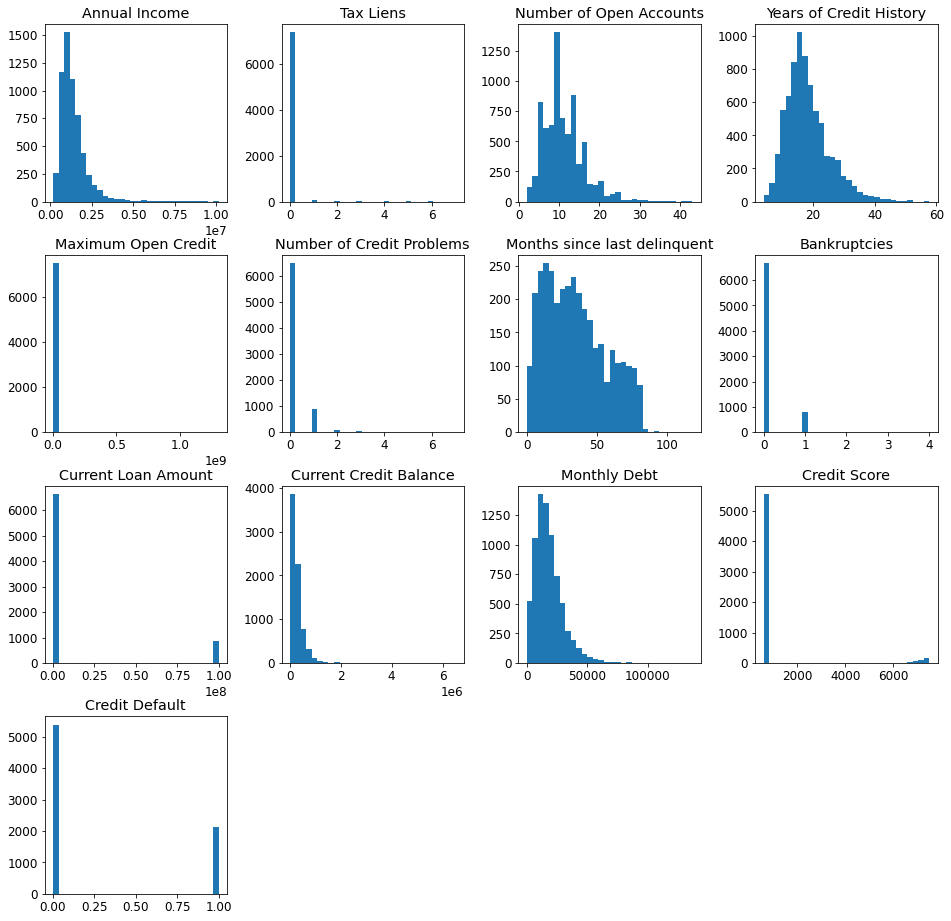

In [20]:
df_num_features = df_train.select_dtypes(include=[np.number])
df_num_features.hist(figsize=(16,16), bins=30, grid=False);

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


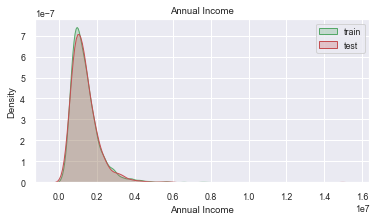

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


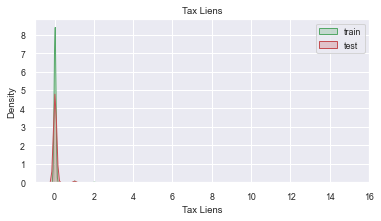

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


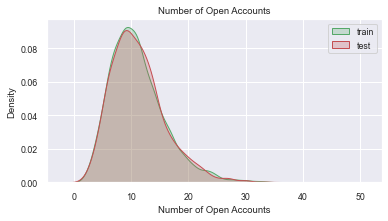

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


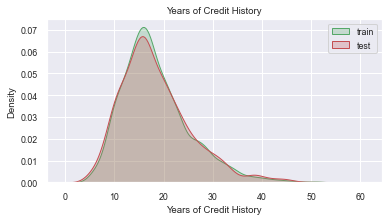

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


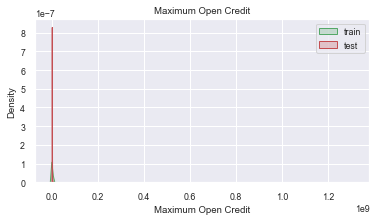

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


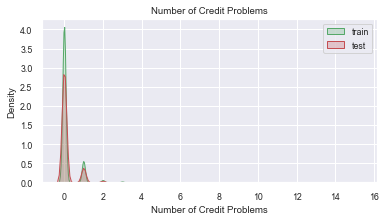

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


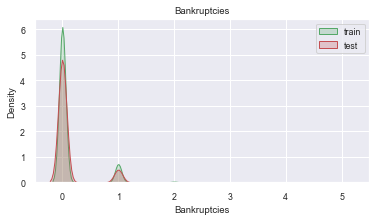

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


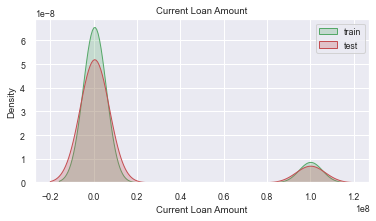

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


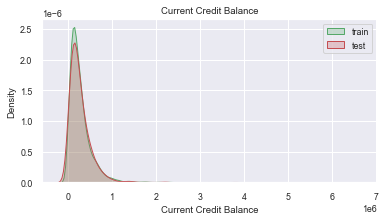

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


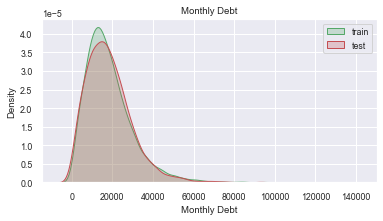

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


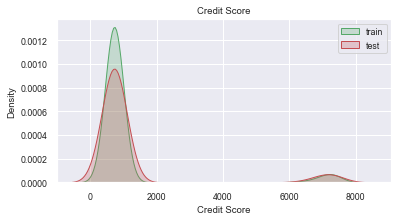

In [21]:
figsize = (6,3)
for col in NUMERIC_FEATURES_TOSCALE:
    plt.figure(figsize=figsize)
    sns.set(font_scale = 0.8)
    sns.kdeplot(df_train[col], shade=True, label='train', color='g')
    sns.kdeplot(df_test[col], shade=True, label='test', color='r')
    print(col)
    print(mannwhitneyu(df_train[col], df_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

### <span style="color:red"> Кандидаты на удаление столбца </span>

* Months since last delinquent - **pvalue = 0%** (< 5%)
* Bankruptcies - **pvalue = 3 %** (< 5%)
* Tax Liens - **pvalue = 9%** (> 5%)

Пока выбираем только первый признак

In [22]:
DROP_FEATURES = ['Months since last delinquent']

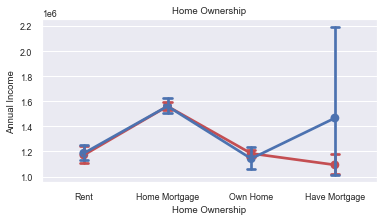

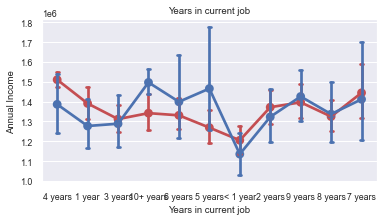

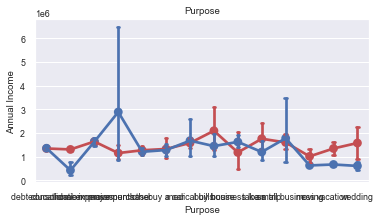

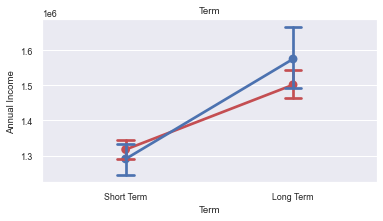

In [23]:
num_feat = 'Annual Income'
for col in CATEGORIES_FEATURES_NAMES:
    plt.figure(figsize = figsize)
    sns.pointplot(x=col, y=num_feat, data=df_train, capsize=.1, label = 'train', color = 'r')
    sns.pointplot(x=col, y=num_feat, data=df_test, capsize=.1, label = 'test', color = 'b')
    plt.title(col)
    plt.show()

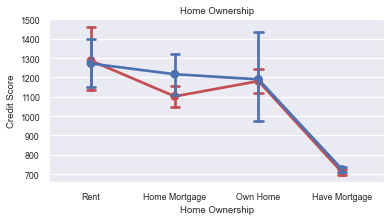

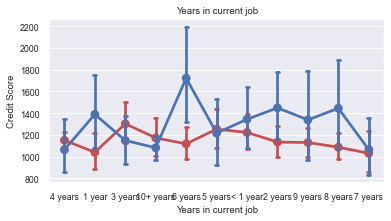

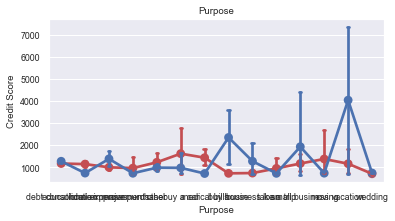

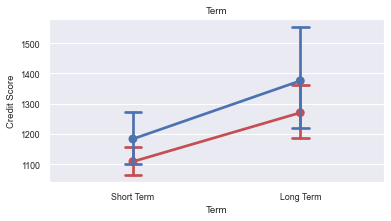

In [24]:
num_feat = 'Credit Score'
for col in CATEGORIES_FEATURES_NAMES:
    plt.figure(figsize = figsize)
    sns.pointplot(x=col, y=num_feat, data=df_train, capsize=.1, label = 'train', color = 'r')
    sns.pointplot(x=col, y=num_feat, data=df_test, capsize=.1, label = 'test', color = 'b')
    plt.title(col)
    plt.show()

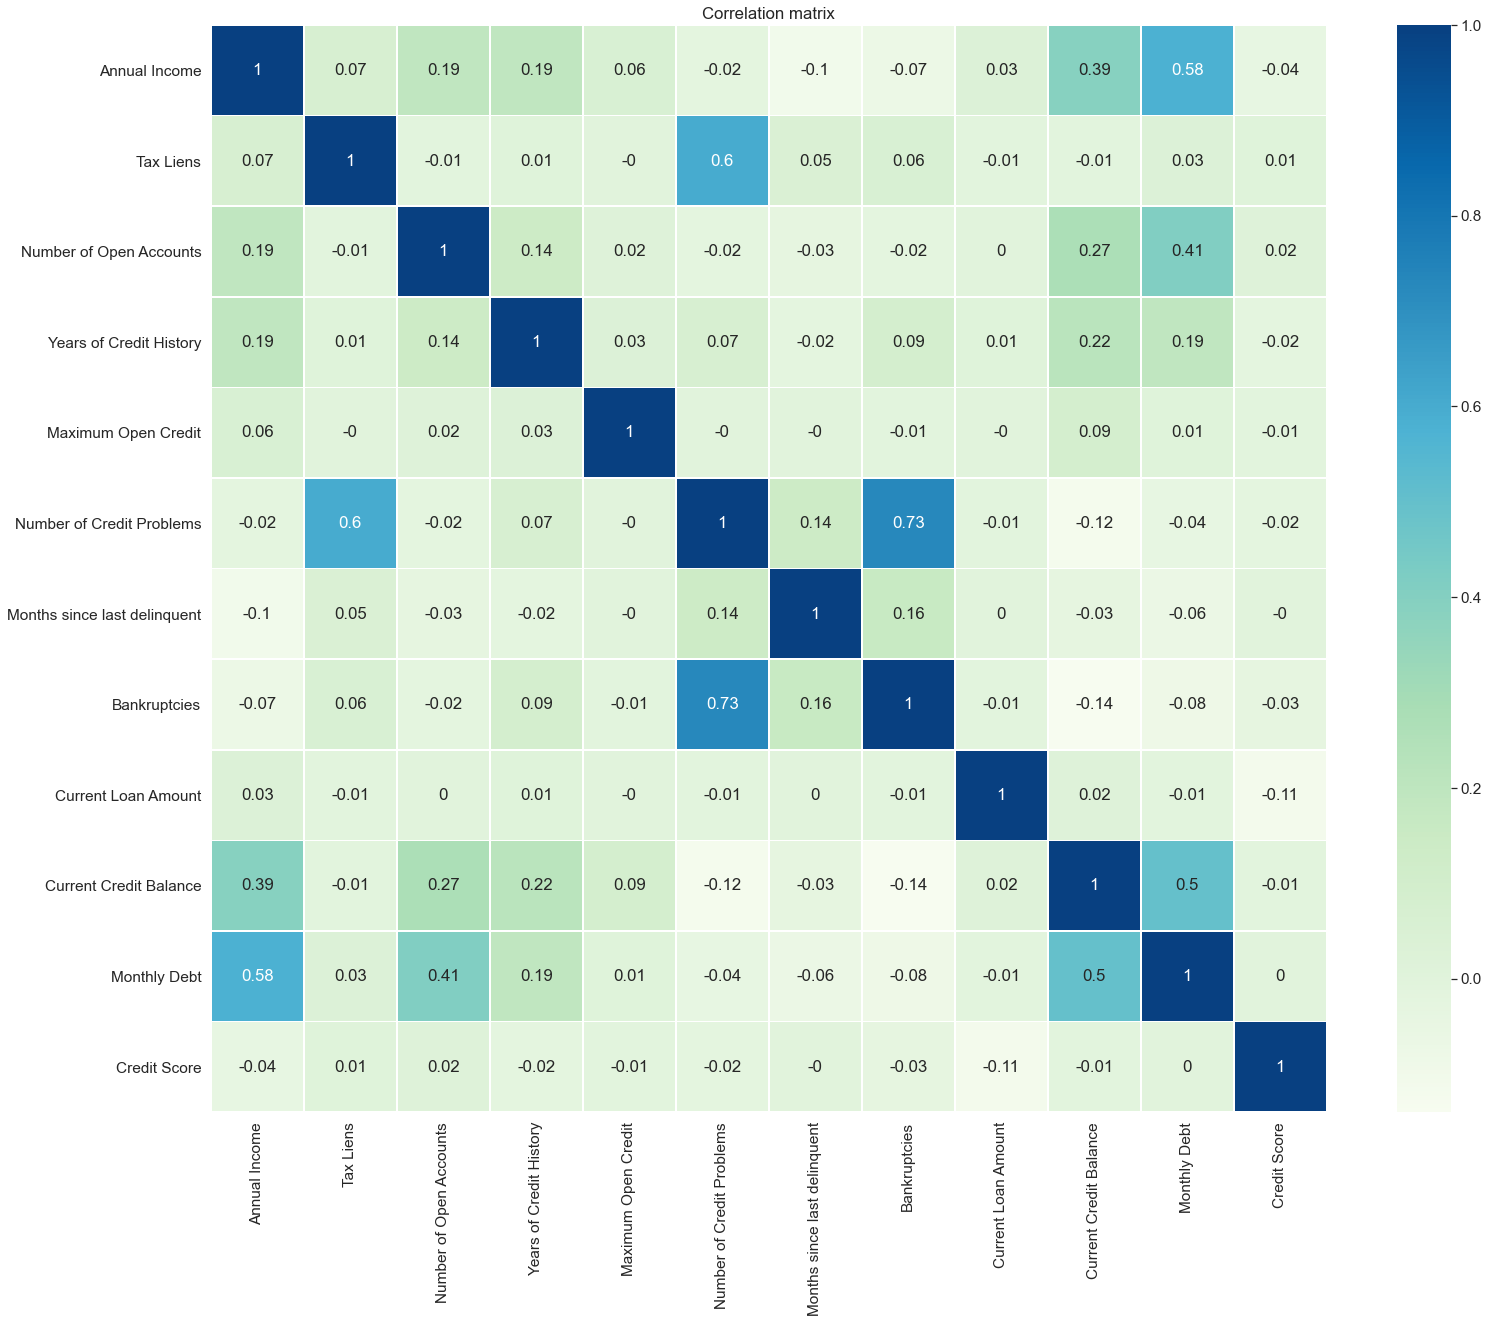

In [25]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(2), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

##### <span style="color:red"> Вывод: </span>
1)  Annual income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score - содержат пропуски в данных

2) Вероятно выбросы в признаках Current Credit Balance, Current Loan Amount, Maximum Open Credit на первый взгляд

3) Имеем 4 категориальных признака - Purpose, Term, Home Ownership, Years in current job

4) Имеются признаки - кандидаты на исключение
* Months since last delinquent - pvalue = 0% (< 5%)
* Bankruptcies - pvalue = 3 % (< 5%)
* Tax Liens - pvalue = 9% (> 5%)

## <span style="color:green"> Категориальные признаки </span>


In [26]:
for i in CATEGORIES_FEATURES_NAMES:
    print('*'*70, '\n', df_train[i].value_counts().count(),'/'
          , df_train[i].value_counts().sum(), '-',i , ': amount of categories / not_nan\n')
    print(df_train[i].value_counts())

********************************************************************** 
 4 / 7500 - Home Ownership : amount of categories / not_nan

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
********************************************************************** 
 11 / 7129 - Years in current job : amount of categories / not_nan

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
********************************************************************** 
 15 / 7500 - Purpose : amount of categories / not_nan

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy ho

### Years in current job

In [27]:
df_train['Years in current job'].mode()[0]

'10+ years'

In [28]:
# Словарь различных значений признака 'Years in current job' с измененным 
# значением '< 1 year' (на 'less 1 year'), поскольку с ним не работает 
# бустинговый алгоритм xgboost из-за того, что при создании даммиес символ '<' идет в название признака

#также считаем, что чем дольше работает человек, тем он стабильнее
dict_years_job = {'10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6, '5 years': 5, 
                  '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1, 'less 1 year': 0}

# Для Варианта 1 ниже
# experience_types = list(dict_years_job.keys())

In [29]:
# Замеяем значение признака '< 1 year' на значени 'less 1 year'
df_train['Years in current job'] = df_train['Years in current job'].replace({'< 1 year': 'less 1 year'})

# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_train = add_features_nan('Years in current job', df_train)

# Вариант 1 - Заполняем пропуски случайным опытом работы
# df_train['Years in current job'].fillna(random.choice(experience_types), 
#                                        inplace = True)

# Вариант 2 - лучше себя показал, чем Вариант 1
mode_years_current_job = df_train['Years in current job'].mode()[0]
df_train['Years in current job'].fillna(mode_years_current_job, inplace = True)


#Создаем категориальный признак, чтобы сохранить информцию об опыте работы
df_train = fill_category('Years in current job', df_train, dict_years_job)

#Создаем признаки dummies для года
df_train = pd.concat([df_train, pd.get_dummies(df_train['Years in current job'], 
                                               prefix='Years in current job')], axis=1)

In [30]:
#TEST
# Замеяем значение признака '< 1 year' на значени 'less 1 year'
df_test['Years in current job'] = df_test['Years in current job'].replace({'< 1 year': 'less 1 year'})

# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_test = add_features_nan('Years in current job', df_test)

# Вариант 1 - Заполняем пропуски случайным опытом работы
# df_test['Years in current job'].fillna(random.choice(experience_types), 
#                                        inplace = True)

# Вариант 2 - лучше себя показал, чем Вариант 1
df_test['Years in current job'].fillna(mode_years_current_job, inplace = True)

#Создаем категориальный признак, чтобы сохранить информцию об опыте работы
df_test = fill_category('Years in current job', df_test, dict_years_job)

#Создаем признаки dummies для года
df_test = pd.concat([df_test, pd.get_dummies(df_test['Years in current job'], 
                                               prefix='Years in current job')], axis=1)

### Term

In [31]:
df_train = fill_category('Term', df_train, {'Short Term': 0, 
                                            'Long Term': 1})

In [32]:
#TEST
df_test = fill_category('Term', df_test, {'Short Term': 0, 
                                          'Long Term': 1})

### Home Ownership

In [33]:
# Создание признаков daammies
df_train = pd.concat([df_train, pd.get_dummies(df_train['Home Ownership'], prefix='Home Ownership')], axis=1)

In [34]:
#TEST
df_test = pd.concat([df_test, pd.get_dummies(df_test['Home Ownership'], prefix='Home Ownership')], axis=1)

## <span style="color:blue"> Числовые признаки </span>

### <span style="color:blue"> Annual Income </span>

In [35]:
# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_train = add_features_nan('Annual Income', df_train)

median_annual_income = df_train['Annual Income'].median()
df_train = fill_nan_median('Annual Income', df_train)

In [36]:
# TEST
df_test = add_features_nan('Annual Income', df_test)

# Заполняем медианой median_annual_income пропуски
df_test['Annual Income'] = df_test['Annual Income'].fillna(median_annual_income)

### <span style="color:blue"> Maximum Open Credit </span>

In [37]:
# Наибольшие по величине открытые кредиты - 3 последних. Они существенно выбиваются из всего списка, 
# причем отметим, что эти значения превосходят максимальную величину суммы, которую предстоит выплатить - Current Loan Amount
df_train['Maximum Open Credit'].value_counts().sort_index().tail(5)

4.092389e+07    1
5.756256e+07    1
2.655129e+08    1
3.800523e+08    1
1.304726e+09    1
Name: Maximum Open Credit, dtype: int64

In [38]:
# Запоминаем места, где были выбросы в значении параметра Maximum Open Credit (подозрительные суммы с учетом параметров)
df_train['Maximum Open Credit_blowout'] = 0
df_train.loc[df_train['Maximum Open Credit'] > 10**8, 'Maximum Open Credit_blowout'] = 1

max_current_loan_amount = df_train['Current Loan Amount'].max()
df_train.loc[df_train['Maximum Open Credit'] > 10**8, 'Maximum Open Credit'] = max_current_loan_amount

In [39]:
# TEST
# Запоминаем места, где были выбросы в значении параметра Maximum Open Credit (подозрительные суммы с учетом параметров)
# up

df_test['Maximum Open Credit_blowout'] = 0
df_test.loc[df_test['Maximum Open Credit'] > 10**8, 'Maximum Open Credit_blowout'] = 1

df_test.loc[df_test['Maximum Open Credit'] > 10**8, 'Maximum Open Credit'] = max_current_loan_amount

### <span style="color:blue"> Months since last delinquent </span>

In [40]:
df_train['Months since last delinquent'].isna().value_counts()

True     4081
False    3419
Name: Months since last delinquent, dtype: int64

<span style="color:red">**С учетом значения pvalue для данного признака и тем, что в нем отсутсвует половина значений - признак удаляем** </span>

### <span style="color:blue"> Bankruptcies </span>

In [41]:
df_train['Bankruptcies'].isna().value_counts()

False    7486
True       14
Name: Bankruptcies, dtype: int64

In [42]:
# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_train = add_features_nan('Bankruptcies', df_train)

# Заполняем пропуски в данных 0-ми, поскольку если нет информации о банкротстве будем считать его нет
df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies'] = 0

In [43]:
#TEST
# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_test = add_features_nan('Bankruptcies', df_test)

# Заполняем пропуски в данных 0-ми, поскольку если нет информации о банкротстве будем считать его нет
df_test.loc[df_test['Bankruptcies'].isna(), 'Bankruptcies'] = 0

### <span style="color:blue"> Credit Score </span>

In [44]:
# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_train = add_features_nan('Credit Score', df_train)

# Заполняем пропуски в данных медианой
median_credit_score = df_train['Credit Score'].median()
df_train = fill_nan_median('Credit Score', df_train)

# Создаем признак там, где явно присутсвует выброс. Поскольку ровно 400 значений аккурат 
# больше 850 (а точнее больше 5000) (граничное значение согласно международной классификации 850)  
# up
df_train['Credit Score_Over Value'] = 0
df_train.loc[df_train['Credit Score'] > 850, 'Credit Score_Over Value'] = 1

# Заполняем выбросы в данных рандомным значением от 300 до 850
# up
# Вариант 1 - лучше всего себя показал
df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'] = df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'] /10

# Вариант 2 
#df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'] = 850
# Вариант 3
#df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'] = random.randint(300, 850)

In [45]:
#TEST
# Новый бинарный признак, сохраняющий информацию о пропусках NAN
df_test = add_features_nan('Credit Score', df_test)

# Заполняем пропуски в данных медианой
df_test['Credit Score'] = df_test['Credit Score'].fillna(median_credit_score)

# Создаем признак там, где явно присутсвует выброс. Поскольку ровно 400 значений аккурат 
# больше 850 (а точнее больше 5000) (граничное значение согласно международной классификации 850)   
df_test['Credit Score_Over Value'] = 0
df_test.loc[df_test['Credit Score'] > 850, 'Credit Score_Over Value'] = 1

# Заполняем выбросы в данных рандомным значением от 300 до 850
# Вариант 1 - лучше всего себя показал
df_test.loc[df_test['Credit Score'] > 850, 'Credit Score'] = df_test.loc[df_test['Credit Score'] > 850, 'Credit Score'] /10

# Вариант 2 
#df_test.loc[df_test['Credit Score'] > 850, 'Credit Score'] = 850
# Вариант 3
#df_test.loc[df_train['Credit Score'] > 850, 'Credit Score'] = random.randint(300, 850)

### <span style="color:blue"> Current Loan Amount </span>

In [46]:
# Вероятный выброс 99999999 - крайне странно выглядет (видимо это предел задолженности)
# Меняем его на медиану
strange_value_loan = 99999999.0
median_loan_amount = df_train['Current Loan Amount'].median()

df_train.loc[df_train['Current Loan Amount'] 
             >= strange_value_loan, 'Current Loan Amount'] = median_loan_amount

In [47]:
# TEST
df_test.loc[df_test['Current Loan Amount'] 
             >= strange_value_loan, 'Current Loan Amount'] = median_loan_amount

##  <span style="color:red"> Разбираемся со списками признаков: Часть 2 </span>

In [48]:
# Новые признаки, которые создали сами
NEW_FEATURES_NAMES = df_train.columns.drop(BASE_FEATURE_NAMES 
                                           + CATEGORIES_FEATURES_NAMES 
                                           + [TARGET_FEATURE] + DROP_FEATURES).tolist()

# Числовые признаки и новые признаки, исключая категориальные признаки
FEATURES_MINUS_CATEGORY = NEW_FEATURES_NAMES + NUMERIC_FEATURES_TOSCALE

# Все признаки в датасете
ALL_FEATURES = CATEGORIES_FEATURES_NAMES + NEW_FEATURES_NAMES + NUMERIC_FEATURES_TOSCALE

In [49]:
CAT_BASE = [
 #'Home Ownership',
 'Annual Income',
 #'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 #'Months since last delinquent',
 'Bankruptcies',
 #'Purpose',
 #'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

NEW_FEATURES = [
'Years in current job_nan',
 'Years in current job_ctg',
 'Years in current job_1 year',
 'Years in current job_10+ years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_less 1 year',
 'Term_ctg',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Annual Income_nan',
 'Maximum Open Credit_blowout',
 'Bankruptcies_nan',
 'Credit Score_nan',
 'Credit Score_Over Value']

DROP_FEAT = CATEGORIES_FEATURES_NAMES + ['Months since last delinquent']

FEATURES = CAT_BASE + NEW_FEATURES

## Подготовка датасета

In [50]:
y = df_train[TARGET_FEATURE]
X = df_train.drop(columns = TARGET_FEATURE)

In [51]:
#TEST
TEST = df_test.copy()

In [52]:
# X.drop(CATEGORIES_FEATURES_NAMES, axis = 1, inplace = True)

In [53]:
#TEST
# TEST.drop(CATEGORIES_FEATURES_NAMES, axis = 1, inplace = True)

In [54]:
X.drop(DROP_FEAT, axis = 1, inplace = True)
TEST.drop(DROP_FEAT, axis = 1, inplace = True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, 
                                                    test_size = 0.33, 
                                                    shuffle=True, 
                                                    stratify=y)

##  <span style="color:purple">  Масштабирование данных </span>

In [56]:
# scaler = StandardScaler()

# X_train_norm = X_train.copy()
# X_test_norm = X_test.copy()

# X_train[NUMERIC_FEATURES_TOSCALE] = scaler.fit_transform(X_train_norm[NUMERIC_FEATURES_TOSCALE])
# X_test[NUMERIC_FEATURES_TOSCALE] = scaler.transform(X_test_norm[NUMERIC_FEATURES_TOSCALE])

In [57]:
#TEST
# TEST_norm = TEST.copy()

# TEST[NUMERIC_FEATURES_TOSCALE] = scaler.transform(TEST_norm[NUMERIC_FEATURES_TOSCALE])


In [58]:
# with open(SCALER_FILE_PATH, 'wb') as file:
#     pickle.dump(scaler, file)

### <span style="color:red"> Вывод </span>

<span style="color:red"> В данном случае, масштабирование данных не помогает увеличить точность предсказаний и, что самое главное, сохранить все метрики в требуемом по заданию минимально допустимом пороге в 0.5, а именно:</span>
* precision >= 0.5   
* recall >= 0.5
* f1-score >= 0.5

## <span style="color:brown"> Oversampling </span>

In [59]:
# df_for_balancing = pd.concat([X_train, y_train], axis=1)
# df_balanced = balance_df_by_target(df_for_balancing, TARGET_FEATURE, method='over')
    
# df_balanced[TARGET_FEATURE].value_counts()

In [60]:
# X_train_balanced = df_balanced.drop(columns=TARGET_FEATURE)
# y_train_balanced = df_balanced[TARGET_FEATURE]

### <span style="color:red"> Вывод </span>

<span style="color:red"> К сожалению, аналогично масштабированию, ни один из методов Sampling'a не дает требуемых результатов, и эффективнее оказывается указание весового признака в моделе. Были перепробованы все разобранные на занятиях модели Sampling'a, и самый эффективной моделью для данной задачи оказалась модель Oversampling'a. Также отметим, что Sampling также не дает сохранить все метрики в требуемом по заданию минимально допустимом пороге в 0.5, а именно:</span>
* precision >= 0.5   
* recall >= 0.5
* f1-score >= 0.5

## <span style="color: orange"> Построение модели - CATboost </span>

### <span style="color:red"> Вывод </span>

<span style="color:red"> Множество экспериментов показало, что наиболее эффективный в данном случае алгоритм классификации, является алгоритм CatBoost. Причем, неожиданно, оказалось крайне сложно выполнить требование по минимальному допустимому порогу значений precision >= 0.5, recall >= 0.5, f1-score >= 0.5. Это связано с тем, что какой-то минимальный выигрышь в одной из переменных влечет проигрышь в другой. Также интерес вызывает полученная модель, с точки зрения интерпретируемости, в силу того, что наиболее важными признаками в ней являются преимущественно бинарные признаки, а не физически понятные (доход и пр.). </span> <span style="color:purple">По всей видимости для улучшения модели, необходимо отказываться от концепции того, что параметры precision, recall, f1-score должны быть больше 0.5, хотя это не точно. Интересно, возможно ли достичь по крайней мере точности на Lederboard около 0.6 с сохранением оотношения precision >= 0.5, recall >= 0.5, **f1-score > 0.6**  </span>

In [61]:
class_proportion = y_train.value_counts()[0]/y_train.value_counts()[1]

In [62]:
%%time

model_catb = catb.CatBoostClassifier(silent=True, random_state=21, 
                                     class_weights=[1, class_proportion])
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3609
           1       0.77      0.90      0.83      1416

    accuracy                           0.90      5025
   macro avg       0.86      0.90      0.88      5025
weighted avg       0.91      0.90      0.90      5025

TEST

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1778
           1       0.50      0.55      0.52       697

    accuracy                           0.72      2475
   macro avg       0.66      0.66      0.66      2475
weighted avg       0.73      0.72      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1389  389
1                315  382
CPU times: user 6.28 s, sys: 288 ms, total: 6.57 s
Wall time: 2.41 s


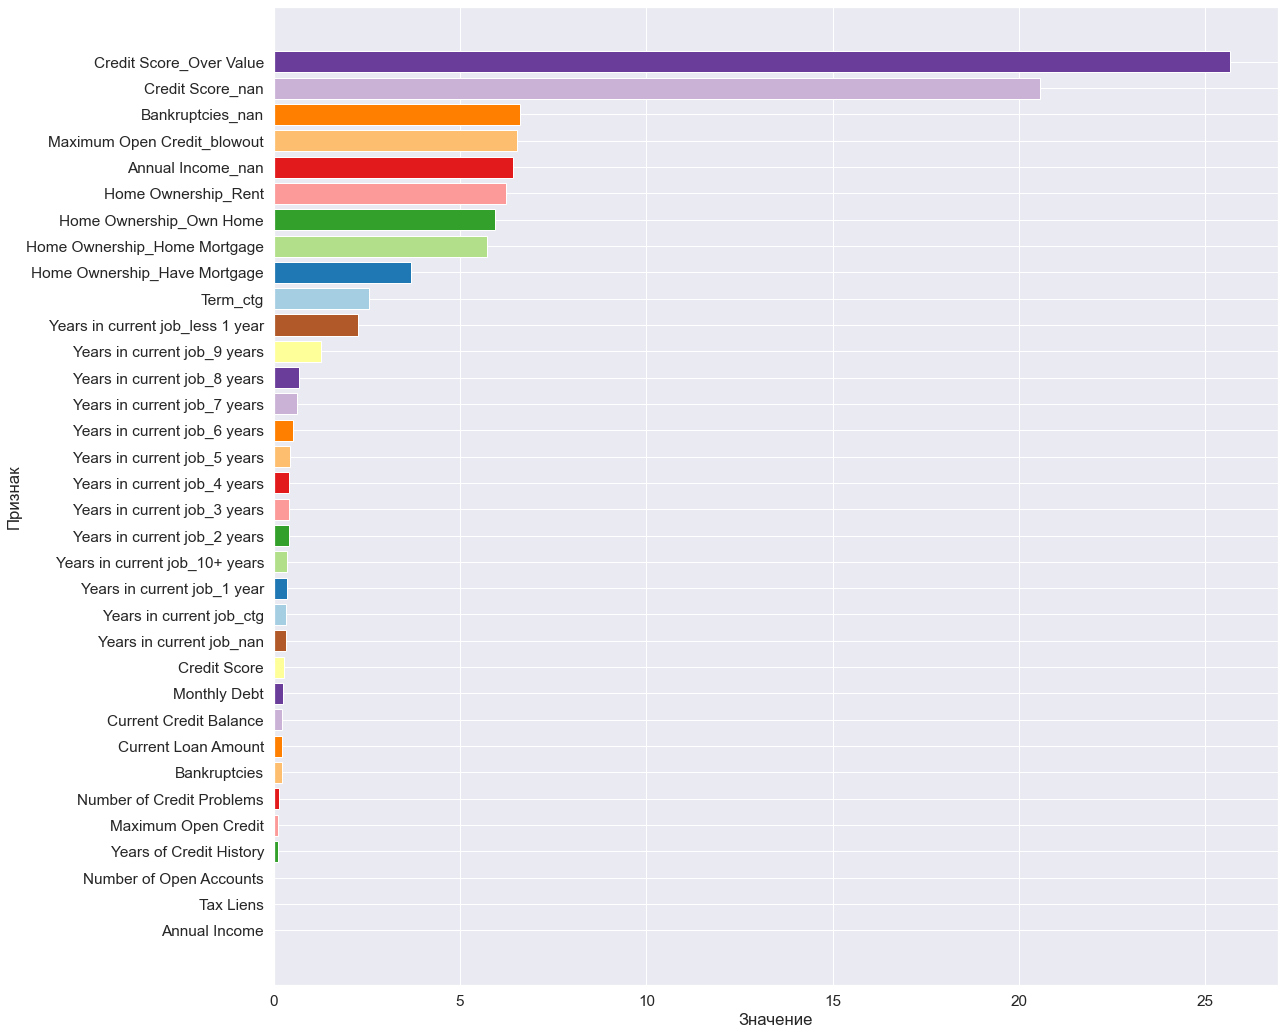

In [63]:
plt.figure(figsize=(18,18))
plt.barh(range(X.shape[1]), sorted(model_catb.feature_importances_, reverse = False), 
         align = 'center', color = sns.color_palette("Paired"))
plt.yticks(np.arange(X.shape[1]), FEATURES)
plt.xlabel('Значение')
plt.ylabel('Признак')
plt.show()

## Попробуем все таки частично избавиться от переобучения

In [64]:
# y_test_pred_probs = model_catb.predict_proba(X_test)
# y_test_pred_probs

In [65]:
# import inspect
# print(inspect.getsource(show_proba_calibration_plots))

In [66]:
# show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [67]:
frozen_params = {
     'class_weights':[1, class_proportion], 
     'silent':True,
     'random_state':21,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}

In [68]:
%%time

model_catb_v2 = catb.CatBoostClassifier(**frozen_params, iterations=300, max_depth=7)
model_catb_v2.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

evaluate_preds(model_catb_v2, X_train, X_test, y_train, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3609
           1       0.57      0.68      0.62      1416

    accuracy                           0.77      5025
   macro avg       0.72      0.74      0.73      5025
weighted avg       0.78      0.77      0.77      5025

TEST

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1778
           1       0.50      0.59      0.54       697

    accuracy                           0.72      2475
   macro avg       0.66      0.68      0.67      2475
weighted avg       0.73      0.72      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1358  420
1                283  414
CPU times: user 467 ms, sys: 33.7 ms, total: 500 ms
Wall time: 369 ms


In [69]:
# model = catb.CatBoostClassifier(**frozen_params,
#                                 iterations=300,
#                                 max_depth=7,
#                                 reg_lambda=0.5
#                                 )

# model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

# evaluate_preds(model, X_train, X_test, y_train, y_test)

In [70]:
# params = {
#     'reg_lambda': np.linspace(0.1, 4, 50)
# }

In [71]:
# model = catb.CatBoostClassifier(**frozen_params,
#                                 iterations=300,
#                                 max_depth=7)

In [72]:
# cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [73]:
# grid_search = model.randomized_search(params, X_train, y_train, n_iter=20, cv=cv, stratified=True, plot=True, refit=True)

In [74]:
# grid_search

In [75]:
# %%time

# evaluate_preds(model, X_train, X_test, y_train, y_test)

# Сохранение полученной модели

In [76]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(model_catb_v2, file)

# Сохранение обучающего и тестового датасетов 

In [77]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [78]:
df_train.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
df_test.to_csv(TEST_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

# Применение к тестовым данным

In [79]:
submit = pd.read_csv(DATA_SAMPLE_PATH)

In [80]:
predictions = model_catb_v2.predict(TEST)

In [81]:
submit['Credit Default'] = predictions
submit.head()

,Id,Credit Default
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [82]:
submit.to_csv('course_submit_final.csv', index=False)